<a href="https://colab.research.google.com/github/MINJIN82/-Ubion/blob/main/project230131_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Team Project 20230131
##유튜브 댓글 텍스트마이닝


## 데이터 수집
### 크롤링
## youtube API V3연동


In [ ]:
!pip install google-api-python-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas
from googleapiclient.discovery import build

api_key = "api_key"
video_id = "CjylrN6SrUU"

comments = list()
api_obj = build('youtube', 'v3', developerKey="api_key")
response = api_obj.commentThreads().list(part='snippet,replies', videoId="CjylrN6SrUU", maxResults=100).execute()

while response:
    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']
        comments.append([comment['textDisplay'], comment['authorDisplayName'], comment['publishedAt'], comment['likeCount']])
 
        if item['snippet']['totalReplyCount'] > 0:
            for reply_item in item['replies']['comments']:
                reply = reply_item['snippet']
                comments.append([reply['textDisplay'], reply['authorDisplayName'], reply['publishedAt'], reply['likeCount']])
 
    if 'nextPageToken' in response:
        response = api_obj.commentThreads().list(part='snippet,replies', videoId="CjylrN6SrUU", pageToken=response['nextPageToken'], maxResults=100).execute()
    else:
        break

df = pandas.DataFrame(comments)
df.to_excel('results.xlsx', header=['comment', 'author', 'date', 'num_likes'], index=None)
df


,0,1,2,3
0,광고를 찾아서 보고....... 기획자님... 승진 각이다,영상 안올라오는 채널,2023-01-31T04:25:17Z,1
1,아~ 사야겠다. 어쩔수가 없구나. 뉴진스님이 광고하는데 사야지 뭐.,주식쟁이,2023-01-30T20:53:28Z,2
2,아니 노트북 광고가 이렇게 상큼할 일인가 ㅋ,chloe hwang,2023-01-30T18:10:29Z,1
3,금일자로 lg 그램으로 스타벅스 출입 가능합니다.,Whee -,2023-01-30T16:50:07Z,1
4,아 진짜 돈 조금만 여유있으면 무조건 사고싶다 그냥..,Whee -,2023-01-30T16:47:15Z,0
...,...,...,...,...
1318,드디어 일하기 시작한 마케팅팀!! 새해에는 잘됐으면 좋겠네용,하늘다람쥐,2023-01-25T08:27:42Z,91
1319,@연결 된적 없다 뿌에엥~~~ 여기 누가 정신병원에서 탈주했어요 빨리 와주세요~~~,묭,2023-01-25T10:16:35Z,2
1320,남자잖아좀. 웃기지좀 마라ㅋ,연결 된적 없다,2023-01-25T09:12:53Z,0
1321,제발 당첨됐으면 좋겠다... 제발...,Ban Heesoo,2023-01-25T08:20:09Z,10


##텍스트마이닝


In [ ]:
df_comment = open("/content/drive/MyDrive/Colab Notebooks/data/뉴진스그램comment.txt","rt", encoding="UTF-8").read()
print(df_comment)

In [ ]:
df_comment

##클래스 별 키워드 추출
### Hannanum(카이스트 클래스), Kkma(서울대학교 클래스),Okt(오픈소스)


In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 40.8 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Kkma, Okt, Komoran, Hannanum
from konlpy.utils import pprint
from collections import Counter

In [ ]:
#Okt 객체 생성_과거 트위터 형태소, 오픈 소스
okt = Okt()
noun = okt.nouns(df_comment)

count = Counter(noun)

#명사 빈도 카운트
noun_list = count.most_common(200)
for v in noun_list : 
    print("Okt 기준 : " +str(v))

Okt 기준 : ('뉴진스', 244)
Okt 기준 : ('광고', 151)
Okt 기준 : ('그램', 102)
Okt 기준 : ('노래', 75)
Okt 기준 : ('진짜', 72)
Okt 기준 : ('노트북', 68)
Okt 기준 : ('엘지', 42)
Okt 기준 : ('에디', 36)
Okt 기준 : ('션', 36)
Okt 기준 : ('거', 34)
Okt 기준 : ('일', 31)
Okt 기준 : ('스텔라', 28)
Okt 기준 : ('맥북', 28)
Okt 기준 : ('곡', 27)
Okt 기준 : ('마케팅', 26)
Okt 기준 : ('사고', 25)
Okt 기준 : ('해린', 23)
Okt 기준 : ('좀', 22)
Okt 기준 : ('모델', 19)
Okt 기준 : ('이', 17)
Okt 기준 : ('토끼', 17)
Okt 기준 : ('제품', 17)
Okt 기준 : ('팀', 17)
Okt 기준 : ('왜', 17)
Okt 기준 : ('가격', 17)
Okt 기준 : ('생각', 17)
Okt 기준 : ('목소리', 16)
Okt 기준 : ('뭐', 15)
Okt 기준 : ('리미', 15)
Okt 기준 : ('역시', 15)
Okt 기준 : ('최고', 14)
Okt 기준 : ('개', 14)
Okt 기준 : ('영상', 14)
Okt 기준 : ('사랑', 14)
Okt 기준 : ('이건', 14)
Okt 기준 : ('디자인', 14)
Okt 기준 : ('음원', 14)
Okt 기준 : ('임', 14)
Okt 기준 : ('때', 14)
Okt 기준 : ('느낌', 14)
Okt 기준 : ('뉴진', 13)
Okt 기준 : ('것', 13)
Okt 기준 : ('팬', 13)
Okt 기준 : ('처음', 13)
Okt 기준 : ('사람', 13)
Okt 기준 : ('더', 13)
Okt 기준 : ('전자', 13)
Okt 기준 : ('티드', 12)
Okt 기준 : ('윤수일', 12)
Okt 기준 : ('민지', 12)
Okt 기

In [ ]:
#Kkma 객체 생성_서울대학교
okt = Kkma()
noun = okt.nouns(df_comment)

count = Counter(noun)

#명사 빈도 카운트
noun_list = count.most_common(200)
for v in noun_list : 
    print("Kkma 기준 : " +str(v))


Kkma 기준 : ('대', 3)
Kkma 기준 : ('위', 3)
Kkma 기준 : ('구', 3)
Kkma 기준 : ('년', 3)
Kkma 기준 : ('분', 3)
Kkma 기준 : ('이', 3)
Kkma 기준 : ('일', 2)
Kkma 기준 : ('그램', 2)
Kkma 기준 : ('뉴진스', 2)
Kkma 기준 : ('오', 2)
Kkma 기준 : ('개', 2)
Kkma 기준 : ('디', 2)
Kkma 기준 : ('만', 2)
Kkma 기준 : ('건', 2)
Kkma 기준 : ('갓', 2)
Kkma 기준 : ('갓진스', 2)
Kkma 기준 : ('하', 2)
Kkma 기준 : ('님', 2)
Kkma 기준 : ('명', 2)
Kkma 기준 : ('삼', 2)
Kkma 기준 : ('하나', 2)
Kkma 기준 : ('굿즈', 2)
Kkma 기준 : ('원', 2)
Kkma 기준 : ('국', 2)
Kkma 기준 : ('바', 2)
Kkma 기준 : ('해린', 2)
Kkma 기준 : ('씨', 2)
Kkma 기준 : ('지', 2)
Kkma 기준 : ('언제', 2)
Kkma 기준 : ('터', 2)
Kkma 기준 : ('등', 2)
Kkma 기준 : ('투', 2)
Kkma 기준 : ('내', 2)
Kkma 기준 : ('둘', 2)
Kkma 기준 : ('여', 2)
Kkma 기준 : ('쪽', 2)
Kkma 기준 : ('번', 2)
Kkma 기준 : ('광고', 1)
Kkma 기준 : ('보고', 1)
Kkma 기준 : ('기획자', 1)
Kkma 기준 : ('승진', 1)
Kkma 기준 : ('각', 1)
Kkma 기준 : ('사야', 1)
Kkma 기준 : ('수', 1)
Kkma 기준 : ('뉴', 1)
Kkma 기준 : ('뉴진스님', 1)
Kkma 기준 : ('진', 1)
Kkma 기준 : ('스님', 1)
Kkma 기준 : ('뭐', 1)
Kkma 기준 : ('노트북', 1)
Kkma 기준 : ('ㅋ', 1)
Kkma 기준 : 

In [ ]:
#Hannanum 객체 생성_카이스트
okt = Hannanum()
noun = okt.nouns(df_comment)

count = Counter(noun)

#명사 빈도 카운트
noun_list = count.most_common(200)
for v in noun_list :
    print("Hannanum  기준 : " +str(v))


Hannanum  기준 : ('뉴진스', 208)
Hannanum  기준 : ('광고', 129)
Hannanum  기준 : ('그램', 78)
Hannanum  기준 : ('진짜', 68)
Hannanum  기준 : ('노래', 64)
Hannanum  기준 : ('노트북', 61)
Hannanum  기준 : ('것', 40)
Hannanum  기준 : ('일', 31)
Hannanum  기준 : ('에디션', 28)
Hannanum  기준 : ('ㅋㅋ', 24)
Hannanum  기준 : ('ㅠㅠ', 20)
Hannanum  기준 : ('ㅋ', 18)
Hannanum  기준 : ('데', 18)
Hannanum  기준 : ('스텔라장', 18)
Hannanum  기준 : ('이', 18)
Hannanum  기준 : ('맥북', 18)
Hannanum  기준 : ('❤', 18)
Hannanum  기준 : ('나', 17)
Hannanum  기준 : ('지', 16)
Hannanum  기준 : ('제품', 15)
Hannanum  기준 : ('생각', 15)
Hannanum  기준 : ('리미티드', 14)
Hannanum  기준 : ('이거', 14)
Hannanum  기준 : ('ㅋㅋㅋㅋㅋ', 14)
Hannanum  기준 : ('.', 14)
Hannanum  기준 : ('목소리', 14)
Hannanum  기준 : ('듯', 14)
Hannanum  기준 : ('수', 13)
Hannanum  기준 : ('디자인', 13)
Hannanum  기준 : ('모델', 13)
Hannanum  기준 : ('뭐', 13)
Hannanum  기준 : ('마케팅', 12)
Hannanum  기준 : ('ㅋㅋㅋ', 12)
Hannanum  기준 : ('가격', 12)
Hannanum  기준 : ('폼', 12)
Hannanum  기준 : ('때', 12)
Hannanum  기준 : ('대박', 12)
Hannanum  기준 : ('토끼', 12)
Hannanum  

##워드클라우드_교수님 알려주신 코드


In [ ]:
from wordcloud import WordCloud

In [ ]:
okt = Okt() #Okt 함수 삽입
line = []

line = okt.pos(df_comment) #품사 삽입
n_adj =[]
for word, tag in line: #워드에 태그를 붙여줘
    if tag in ["Noun","Adjective"]: #명사랑 형용사만 뽑을게
      n_adj.append(word)
print(n_adj) #리스트 안에 명사,형용사

['광고', '보고', '기획', '자', '승진', '각', '수가', '없구나', '뉴진', '스님', '광고', '뭐', '아니', '노트북', '광고', '상큼', '일인', '금일', '그램', '스타벅스', '출입', '가능합니다', '진짜', '돈', '조금', '여유', '있으면', '무조건', '그냥', '광고', '모델', '이', '것', '매우', '최고', '뉴진스', '사고', '만드', '오', '엘지', '일', '가볍기', '정말', '가벼', '움', '개', '이쁘다', '리미', '티드', '에디', '션', '싶드', '뉴진스', '팬싸인회', '꼭', '요즘', '만', '뉴진스', '콜라보', '화이팅', '입니다', '뉴진스', '노트북', '이뻐요', '한정판', '던데', '에르', '쥐', '장난', '맹글어', '해외', '팬', '경쟁', '광속', '매진', '스텔라', '장', '버전', '편곡', '요', '노래', '뒤', '맥북', '거', '프로모션', '영상', '아니냐', '어떻게', '회수', '일단', '광고', '졸라', '뉴진스', '알고리즘', '옴', '광고', '뉴진스', '처음', '갓진스', '가사', '기능', '설명', '간', '사람', '꼭', '광고', '이쁘고', '청량하고', '뭉클해', '뉴진스', '그램', '아름다워', '뉴진스', '여기', '혜인', '이쁨', '사랑', '강', '해린', '이뿌다', '나', '진짜', '뉴진스때문', '덕질', '라이프', '공개', '인스타', '당장', '업로드', '성보고', '마케팅', '윤수일', '노래', '재탄생', '역시', '위', '가수', '아님', '예전', '명곡', '리메이크', '앨범', '하나', '부탁', '그램', '전면', '토끼', '마리', '있으면', '더', '좋습니다', '광고', '레트로', '뉴진스', '아깝다', '광고', '효', '걸', '놈', '문제', '론데', '

In [ ]:
counts = Counter(n_adj)
tags = counts.most_common(50)
print(counts)
print(tags)

Counter({'뉴진스': 244, '광고': 151, '그램': 102, '노래': 75, '진짜': 72, '노트북': 68, '엘지': 42, '에디': 36, '션': 36, '거': 34, '스텔라': 28, '맥북': 28, '곡': 27, '마케팅': 26, '사고': 25, '아름다워': 25, '해린': 23, '좀': 22, '모델': 19, '이': 17, '토끼': 17, '제품': 17, '팀': 17, '왜': 17, '가격': 17, '생각': 17, '이쁘다': 16, '목소리': 16, '뭐': 15, '리미': 15, '역시': 15, '최고': 14, '개': 14, '영상': 14, '사랑': 14, '이건': 14, '디자인': 14, '음원': 14, '미쳤다': 14, '때': 14, '느낌': 14, '뉴진': 13, '것': 13, '팬': 13, '처음': 13, '사람': 13, '더': 13, '전자': 13, '티드': 12, '윤수일': 12, '민지': 12, '폼': 12, '대박': 12, '저': 12, '오': 11, '나': 11, '레트로': 11, '걸': 11, '예쁘다': 11, '보고': 10, '아니': 10, '한정판': 10, '스랑': 10, '좋다': 10, '대세': 10, '세상': 10, '말': 10, '멤버': 10, '버전': 9, '요': 9, '여기': 9, '하나': 9, '중': 9, '하니': 9, '이번': 9, '돈': 8, '강': 8, '또': 8, '굿': 8, '제대로': 8, '이쁘네': 8, '이뻐': 8, '삼성': 8, '그': 8, '귀여워': 8, '아이폰': 8, '수': 8, '그냥': 7, '정말': 7, '꼭': 7, '요즘': 7, '콜라보': 7, '위': 7, '리메이크': 7, '시티': 7, '팝': 7, '감성': 7, '우리': 7, '내': 7, '이제': 7, '아름다운': 7, '지금': 7, '기획': 6, '

In [ ]:
from wordcloud import WordCloud

In [ ]:
#불필요한(불용어어) 문자 삭제
stop_words = " 개, 강, 중,요, 수, 그, 시티,위,팀,또,이, 스랑, 함,오, 팝, 강, 더, 일, 임, 개"
stop_words = set(stop_words.split(" "))
n_adj = [word for word in n_adj if not word in stop_words] 

(-0.5, 399.5, 199.5, -0.5)

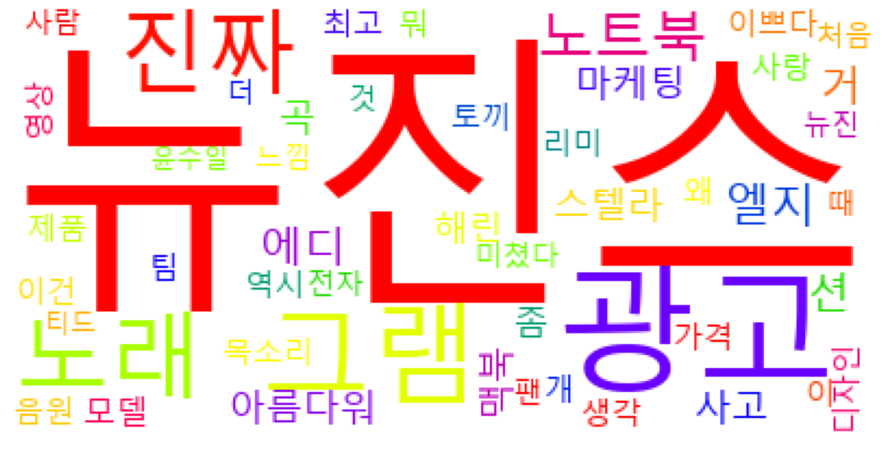

In [ ]:
font ="/content/drive/MyDrive/malgun.ttf"
word_cloud = WordCloud(font_path=font, background_color="white",max_font_size=300, colormap="prism").generate_from_frequencies(dict(tags))
import matplotlib.pyplot as plt
plt.figure(figsize = (50,8))
plt.imshow(word_cloud)
plt.axis("off")